# Project Title: Prediction of Air Quality from Traffic Volume in Nova Scotia

## Application of a decision tree classifier to classify the average CO level

The current project explored the impact of the traffic in Nova Scotia on air quality, measured by the carbon monoxide (CO) levels of the roadside. The main goal was to build a model using the decision tree classifier to predict the average CO level using the descriptive features from the traffic data. The hourly ambient CO data which covered the time period from 2018 to 2020 were obtained from Open Data Nova Scotia [1]. The data consisted of 236,687 observations with the following five features: Date & Time, Pollutant, Unit, Station, and Average. The traffic volume data were obtained again from Open Data Nova Scotia [2] which covered the time period from 2005 to 2019. The data consisted of 586 observations with the following six features: Date, 
HIGHWAY, SECTION, SECTION LENGTH, ADT, and AADT. ADT stands for Average Daily Traffic which represents the average number of vehicles passing the count location in a 24-hour period. AADT stands for Annual Average Daily Traffic which represents the average number of vehicles passing the count location in a 24-hour period, averaged on the basis of one year [2].

### Load data

In [18]:
#load datasets
import pandas as pd

CO_df=pd.read_csv('dataset/Nova_Scotia_Provincial_Ambient_Carbon_Monoxide__CO__Hourly_Data_Halifax_Johnston.csv')
traffic_df=pd.read_csv('dataset/cleaned_traffic_data.csv')

### Preprocessing the data

The next step was to preprocess both CO data and traffic data. The hourly CO data were aggregated by the dates to extract the mean CO level per date and restricted to the observations from 2019. Next, the data were normalized to a range of 0 to 1 and discretized using 0.5 as a threshold into “High” (≥0.5) vs. “Low” (˂0.5) class, creating a target feature called “Label”. As a 
result, the final CO dataset included 365 observations and three features: Date, Average, and Label. Then it was joined with the traffic data, resulting in a final dataset of 586 observations and eight features: Date, HIGHWAY, SECTION, SECTION LENGTH, ADT, AADT, Average, and Label. Below is a summary visualization of the final combined dataset

In [19]:
#preprocess the datasets
import pandas as pd
import numpy as np

#convert Date & Time column to datetime datatype
CO_df['Date & Time']=pd.to_datetime(CO_df['Date & Time'],format='%m/%d/%Y %I:%M:%S %p')
#extract date from timestamp
CO_df['Date']=CO_df['Date & Time'].dt.date
#group by date and extract mean
avgCO_byDate=CO_df.groupby('Date').mean().reset_index()
avgCO_byDate_2019=avgCO_byDate[pd.DatetimeIndex(avgCO_byDate['Date']).year==2019]
avgCO_byDate_2019=pd.DataFrame(avgCO_byDate_2019)
#normalize to a range of 0 to 1
avgCO_byDate_2019['Average']=(avgCO_byDate_2019['Average']-avgCO_byDate_2019['Average'].min())/    \
    (avgCO_byDate_2019['Average'].max()-avgCO_byDate_2019['Average'].min())
#discretize with a threshold of 0.5
avgCO_byDate_2019['Label']=np.where(avgCO_byDate_2019['Average']>=0.5, 'High', 'Low')
avgCO_byDate_2019['Date']=pd.to_datetime(avgCO_byDate_2019['Date'],format='%Y-%m-%d')
avgCO_byDate_2019.head(10)

,Date,Average,Label
9131,2019-01-01,0.599010,High
9132,2019-01-02,0.638614,High
9133,2019-01-03,0.908416,High
9134,2019-01-04,0.789604,High
9135,2019-01-05,0.900990,High
9136,2019-01-06,0.675743,High
9137,2019-01-07,0.621287,High
9138,2019-01-08,0.715347,High
9139,2019-01-09,0.542079,High
9140,2019-01-10,0.750000,High


In [20]:
import pandas as pd
import numpy as np

#process traffic_df
traffic_df['Date']=pd.to_datetime(traffic_df['Date'],format='%Y-%m-%d')
traffic_df.head(10)

,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT
0,2019-09-09,1,47,4.50,2.566,2.430
1,2019-06-17,1,50,7.60,4.266,3.840
2,2019-06-17,1,50,7.60,3.934,3.545
3,2019-06-17,1,50,7.60,2.924,2.640
4,2019-09-09,1,50,7.60,6.164,5.520
5,2019-06-17,1,50,7.60,2.984,2.690
6,2019-09-16,1,60,4.61,4.351,3.880
7,2019-09-09,1,65,9.75,2.074,1.780
8,2019-09-09,1,70,3.67,4.079,3.650
9,2019-09-09,1,80,8.96,2.233,2.000


In [21]:
#combine CO and traffic data
CO_traffic_df=pd.merge(traffic_df,avgCO_byDate_2019,how='inner',on='Date')
CO_traffic_df.info()
CO_traffic_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 585
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            586 non-null    datetime64[ns]
 1   HIGHWAY         586 non-null    int64         
 2   SECTION         586 non-null    int64         
 3   SECTION LENGTH  586 non-null    float64       
 4   ADT             586 non-null    float64       
 5   AADT            586 non-null    float64       
 6   Average         586 non-null    float64       
 7   Label           586 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 41.2+ KB


,Date,HIGHWAY,SECTION,SECTION LENGTH,ADT,AADT,Average,Label
0,2019-09-09,1,47,4.50,2.566,2.43,0.455984,Low
1,2019-09-09,1,50,7.60,6.164,5.52,0.455984,Low
2,2019-09-09,1,65,9.75,2.074,1.78,0.455984,Low
3,2019-09-09,1,70,3.67,4.079,3.65,0.455984,Low
4,2019-09-09,1,80,8.96,2.233,2.00,0.455984,Low
5,2019-09-09,202,5,7.45,421.000,380.00,0.455984,Low
6,2019-09-09,202,5,7.45,419.000,370.00,0.455984,Low
7,2019-09-09,202,7,8.32,581.000,520.00,0.455984,Low
8,2019-09-09,215,40,5.42,2.430,2.17,0.455984,Low
9,2019-06-17,1,50,7.60,4.266,3.84,0.586634,High


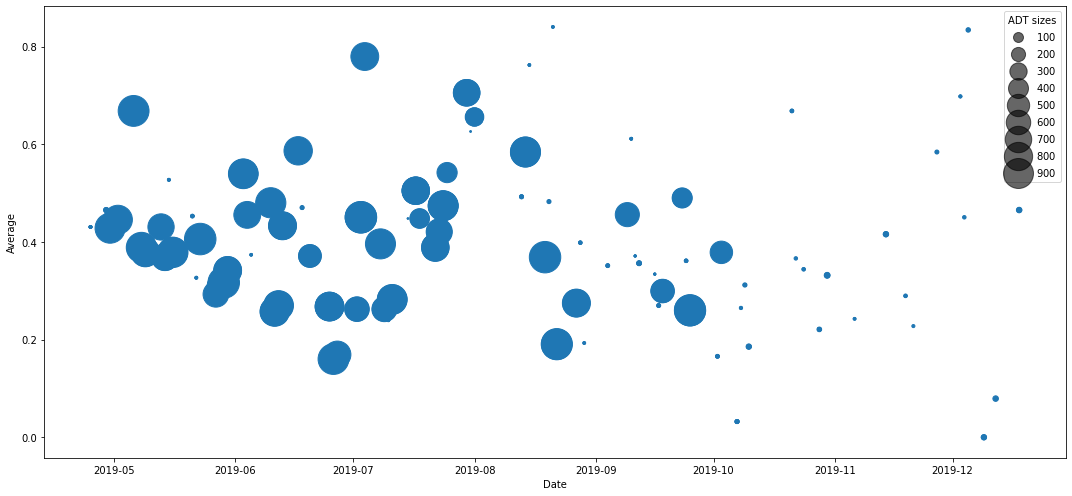

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x=CO_traffic_df['Date']
y=CO_traffic_df['Average']
colors=CO_traffic_df['ADT']

plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True

f, ax = plt.subplots()

points = ax.scatter(x, y, s=colors)
handles, labels = points.legend_elements(prop="sizes", alpha=0.6)
legend = ax.legend(handles, labels, loc="upper right", title="ADT sizes")

plt.xlabel("Date")
plt.ylabel("Average")
plt.show()

Text(0.5, 0, 'Section Length')

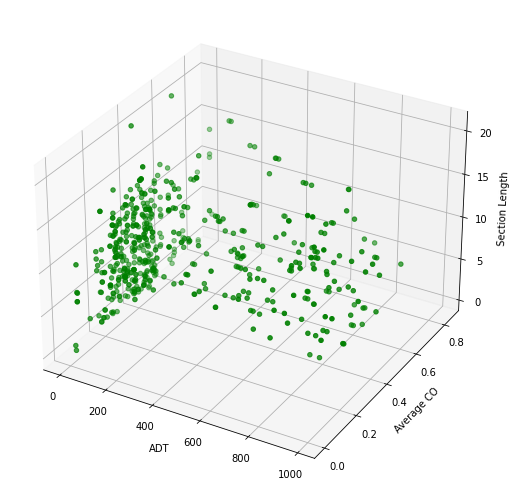

In [23]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x=CO_traffic_df['ADT'].to_numpy()
y=CO_traffic_df['Average'].to_numpy()
z=CO_traffic_df['SECTION LENGTH'].to_numpy()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z,color = "green")
ax.set_xlabel('ADT')
ax.set_ylabel('Average CO')
ax.set_zlabel('Section Length')

### Define descriptive and target features

Five features (HIGHWAY, SECTION, SECTION LENGTH, ADT, and AADT) were chosen to build up a model classifying the target feature “Label”. The Date was not chosen because no particular trend was identified between Date and Average from the figure above. The reasoning behind HIGHWAY and SECTION was based on the assumption that certain highways and sections would have more traffic volumes than others. For example, the main highways leading to the City of Halifax (the biggest city in Nova Scotia with a population of around 450,000) such as 102, 111, and 118 would have higher traffic volumes than other highways. Also, certain sections on these highways that lead to major city entries such as MacDonald Bridge would have higher traffic volume than other sections. SECTION LENGTH was chosen as well because it was assumed that a longer section length would lead to a higher level of CO emission due to the extended time of the vehicles’ stay on the road. All the three features are assumed to impact 
ADT and AADT, which again would impact the CO emission (High vs. Low). The model’s task for the current project was to classify the CO classes (High vs. Low) using the decision tree and five features mentioned above. A decision tree model was chosen because of its flexibility to incorporate both categorical and continuous descriptive features to predict the target feature.

In [24]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_selection import mutual_info_classif

#split dataset in features and target variable
feature_cols=['HIGHWAY','SECTION','SECTION LENGTH','ADT','AADT']
X=CO_traffic_df[feature_cols] # Features
y=CO_traffic_df['Label'] # Target variable

### Splitting the dataset into train and test sets

In [25]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

### Apply a decision tree classifier

In [26]:
# Create Decision Tree classifer object
clf=DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf=clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred=clf.predict(X_test)

In [27]:
#https://www.datatechnotes.com/2019/02/classification-with-sklearn-decision.html
accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_pred,y_test)
cm=confusion_matrix(y_test,y_pred)

print("Accuracy:",'%.3f' % accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy: 0.812
Classification report:
              precision    recall  f1-score   support

        High       0.51      0.52      0.51        56
         Low       0.89      0.88      0.88       237

    accuracy                           0.81       293
   macro avg       0.70      0.70      0.70       293
weighted avg       0.81      0.81      0.81       293

Confusion matrix:
[[ 29  28]
 [ 27 209]]


### Visualize the decision tree

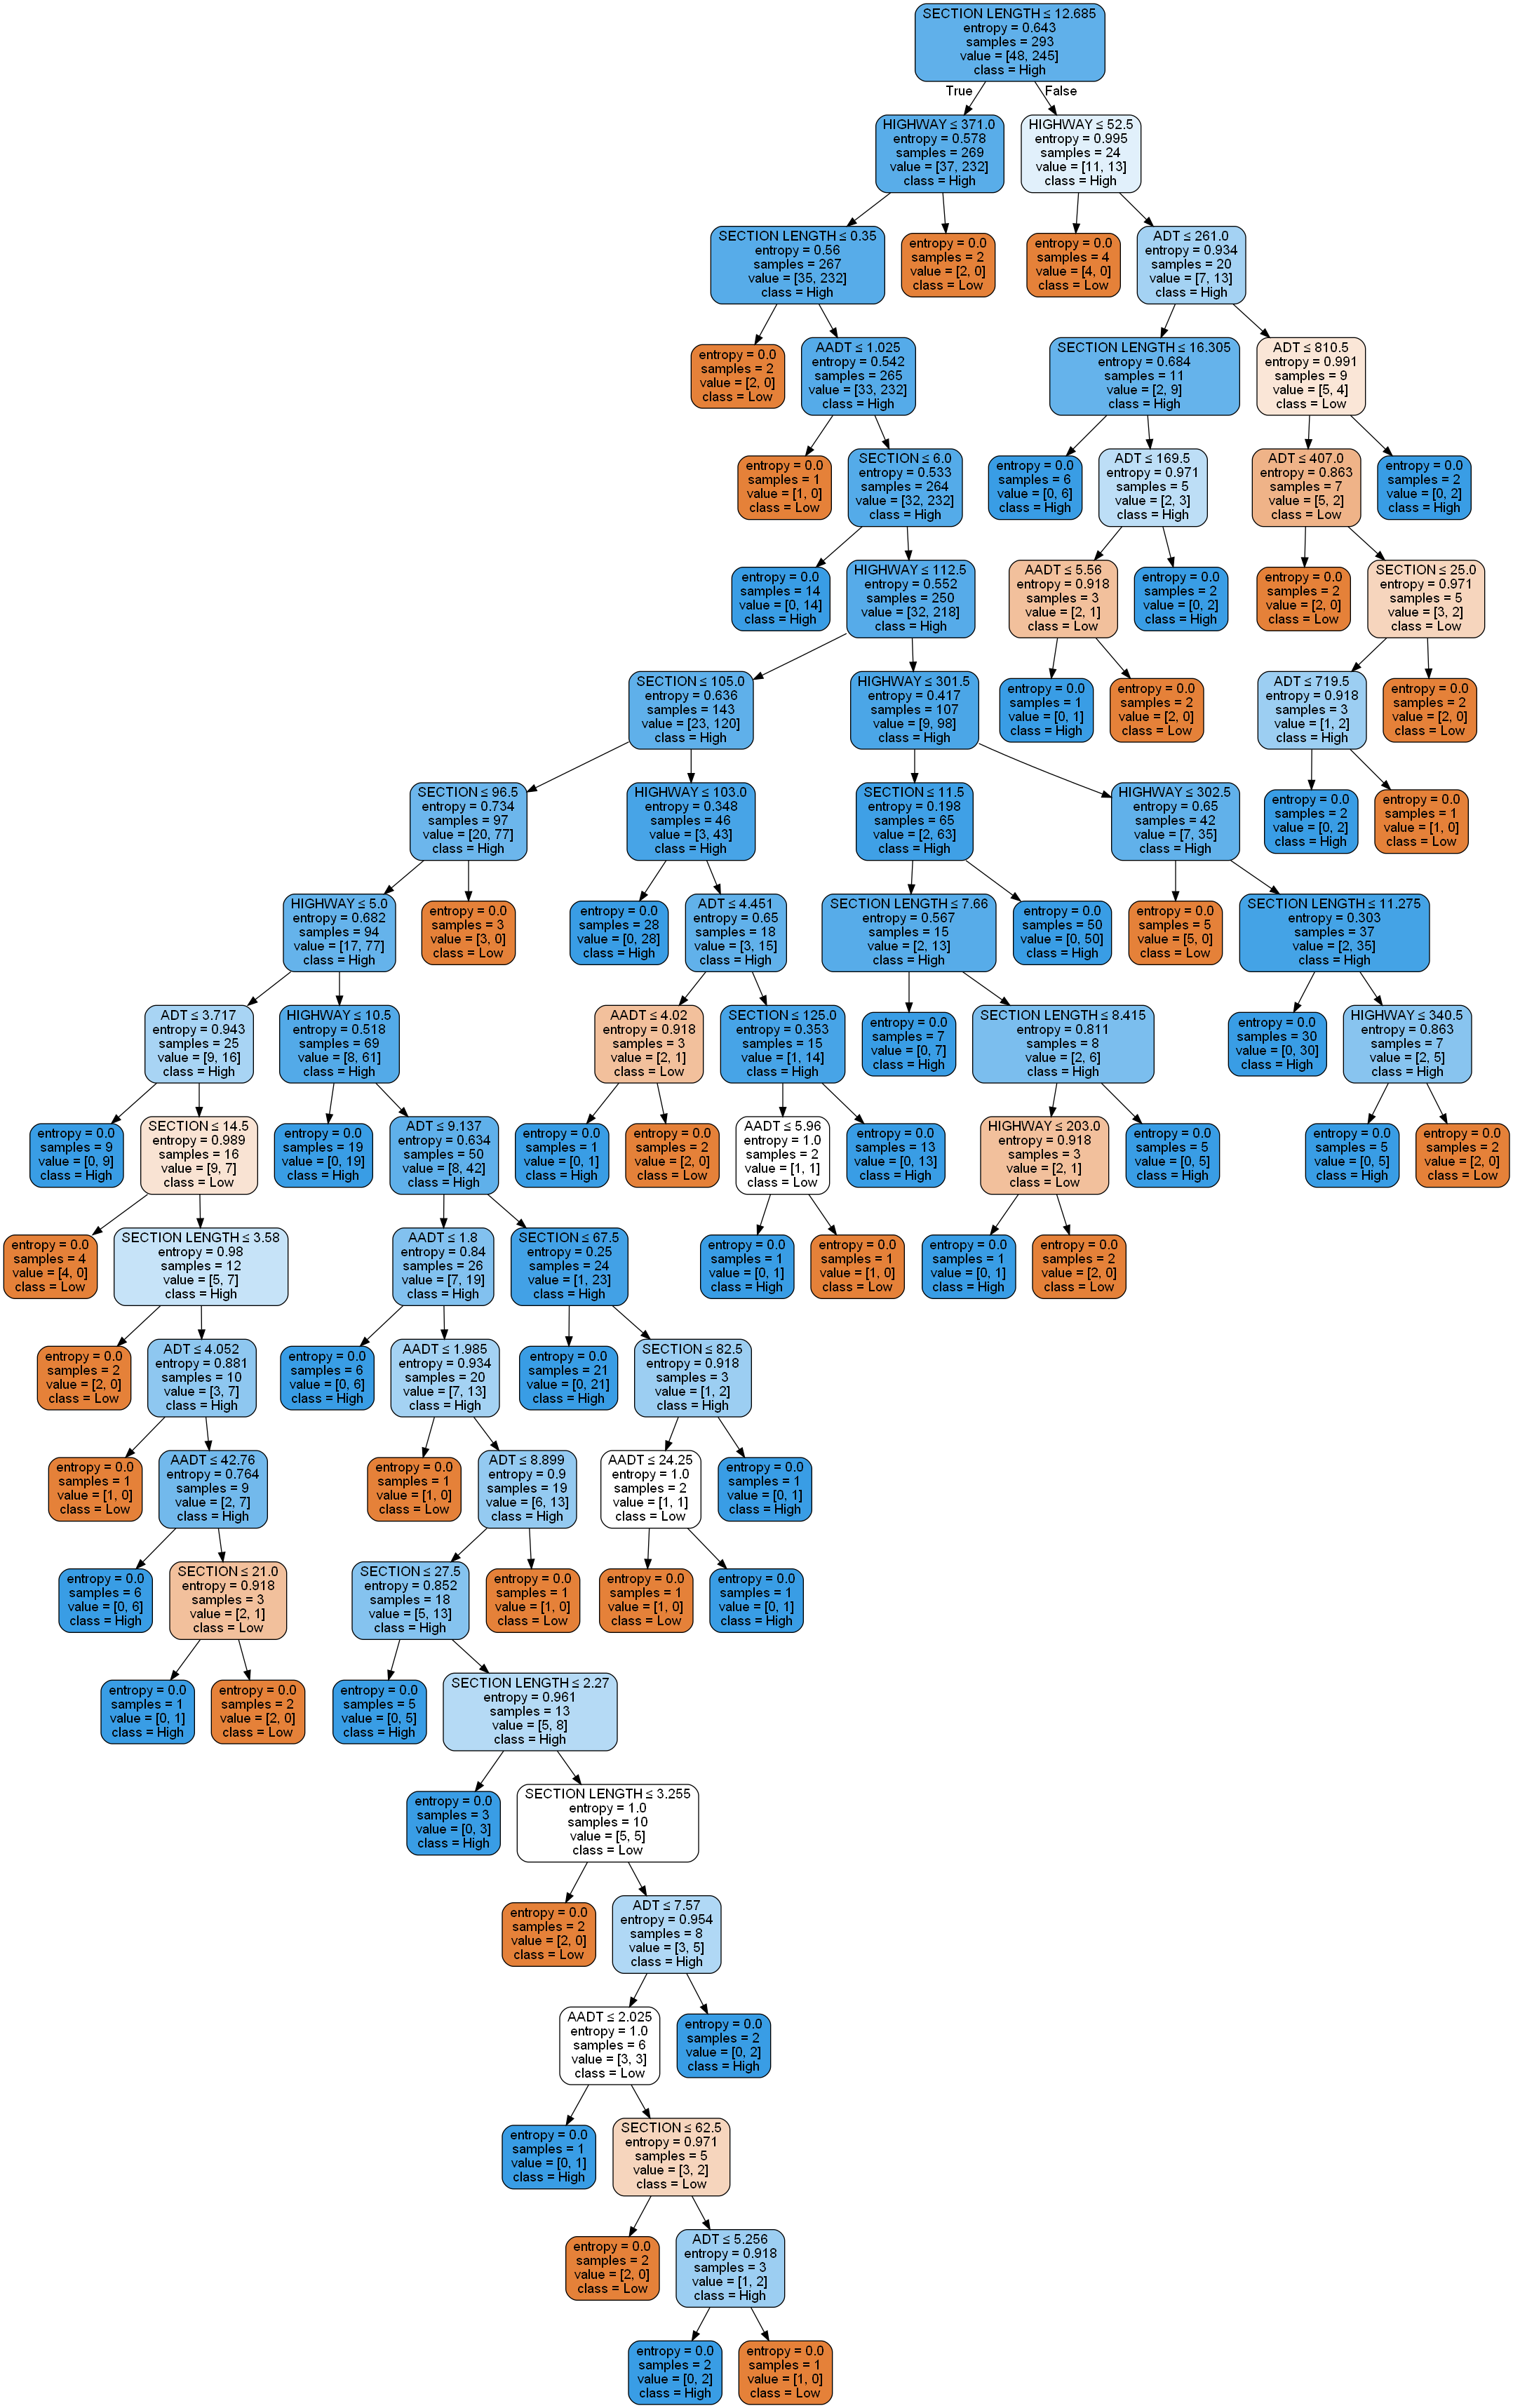

In [28]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data=StringIO()
export_graphviz(clf,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Low','High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


SECTION LENGTH was the most influential factor for CO level as it is at the root node of the decision tree, which was also indicated by the fact that the calculated information gain for SECTION LENGTH was the highest among all descriptive features included in the model.

In [29]:
# https://machinelearningmastery.com/information-gain-and-mutual-information/
# calculate the entropy for the split in the dataset
import math
def entropy(class0, class1):
    return -(class0 * math.log2(class0) + class1 * math.log2(class1))

sizeDataset=len(CO_traffic_df)
sizeHigh=len(CO_traffic_df[CO_traffic_df['Label']=='High'])
sizeLow=len(CO_traffic_df[CO_traffic_df['Label']=='Low'])
classHigh=sizeHigh/sizeDataset
classLow=sizeLow/sizeDataset
t_entropy = entropy(classHigh, classLow)
print('Dataset Entropy: %.3f bits' % t_entropy)

def IG(feature, partition_value):
    s1=len(CO_traffic_df[(CO_traffic_df[feature]>=partition_value)])/len(CO_traffic_df)
    s2=len(CO_traffic_df[(CO_traffic_df[feature]<partition_value)])/len(CO_traffic_df)
    
    s1_classHigh=len(CO_traffic_df.loc[(CO_traffic_df[feature]>partition_value)&(CO_traffic_df['Label']=='High')])/    \
        len(CO_traffic_df[CO_traffic_df[feature]>partition_value])
    s1_classLow=len(CO_traffic_df.loc[(CO_traffic_df[feature]>partition_value)&(CO_traffic_df['Label']=='Low')])/    \
        len(CO_traffic_df[CO_traffic_df[feature]>partition_value])
    s1_entropy=entropy(s1_classHigh, s1_classLow)
    
    s2_classHigh=len(CO_traffic_df.loc[(CO_traffic_df[feature]<=partition_value)&(CO_traffic_df['Label']=='High')])/    \
        len(CO_traffic_df[CO_traffic_df[feature]<=partition_value])
    s2_classLow=len(CO_traffic_df.loc[(CO_traffic_df[feature]<=partition_value)&(CO_traffic_df['Label']=='Low')])/    \
        len(CO_traffic_df[CO_traffic_df[feature]<=partition_value])
    s2_entropy=entropy(s2_classHigh, s2_classLow)
    
    gain=t_entropy-(s1*s1_entropy + s2*s2_entropy)
    print('Information Gain for ',feature,': ','%.3f bits' % gain)

IG('SECTION LENGTH',12.685)

Dataset Entropy: 0.678 bits
Information Gain for  SECTION LENGTH :  0.022 bits


### 10-fold cross-validation

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tkinter
import matplotlib

X=CO_traffic_df[feature_cols].to_numpy() # Features
y=CO_traffic_df['Label'].to_numpy() # Target variable

kf = KFold(n_splits=10)
kf.get_n_splits(X)

KFold(n_splits=10, random_state=None, shuffle=False)
acc_all=np.array([])
cm_final=np.zeros((2,2))
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf2=DecisionTreeClassifier(criterion='entropy')
    clf2.fit(X_train, y_train)
    y_pred=clf2.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
 
    cm_final=cm_final+conf_matrix

    report=classification_report(y_pred,y_test)
    
    acc=accuracy_score(y_test,y_pred)
    
    acc_all=np.append(acc_all,acc)
avg_acc=acc_all.mean()
avg_acc_std=acc_all.std()
print("\nConfusion matrix:")
print(cm_final)
avg_precision=cm_final[0,0]/(cm_final[0,0]+cm_final[1,0])
avg_recall=cm_final[0,0]/(cm_final[0,0]+cm_final[0,1])
avg_F1=2*(avg_recall*avg_precision)/(avg_recall+avg_precision)
print("Precision: ",'%.3f' % avg_precision ,sep="")
print("Recall: ",'%.3f' % avg_recall ,sep="")
print("F1-score: ",'%.3f' % avg_F1 ,sep="")
print("Accuracy: ",'%.3f' % avg_acc, sep="")


Confusion matrix:
[[ 13.  92.]
 [ 97. 384.]]
Precision: 0.118
Recall: 0.124
F1-score: 0.121
Accuracy: 0.678


C:\Users\dalby\opencv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dalby\opencv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dalby\opencv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Both the 50:50 training-test split model and 10-fold cross-validation model have leaves with a sample as the trees go from the top to the bottom. Partially this is due to having min_samples_split and min_samples_leaf set to 2 and 1, respectively, by default. Having small leaves could indicate the presence of overfitting. Also, the held-out model achieved a reasonable amount of accuracy (0.83), there is a considerable amount of discrepancy between the prediction of the two classes (High vs. Low) in terms of the precision, recall, and F1-scores. This could be caused by the fact that the sample was unbalanced (High: 18% vs. Low: 82%). Thus, based on the precision, recall, and F1-score along, it seems that the model overfitted the “Low” class and 
underfitted the “High” class.

## Summary

The CO level & traffic volume combined dataset yielded 586 observations consisting of 5 descriptive features (HIGHWAY, SECTION, SECTION LEGNTH, ADT, AADT) and 1 target feature (High vs. Low) and was split into 50 to 50 for training and test. The initial decision tree model achieved an accuracy score of 0.83. Due to the unbalanced sample issue, however, the precision, recall, and F1 scores between “High” and “Low” class showed a considerable amount of discrepancy. Next, a 10-fold cross-validation technique was applied to the same dataset which brought the average accuracy score of 0.66. Although each fold showed a variety of precision, recall, F1 score, and accuracy score, overall, overfitting to the “Low” class was observed across all the folds. Interestingly, the final accuracy score of the 10-fold cross-validation model was lower than the initial 50:50 train-test model, but perhaps this may offer us a better picture of the expected accuracy score when our DT model was run on unseen data in the future. Both the held out and the 10-fold cross-validation model had many small leaves, indicating the possible presence of overfitting. Lastly, changing max_depth, min_samples_split, and min_samples_leaf all impacted the depth of the decision tree, which again impacted the final accuracy score. When the depth of the tree got shorter, the overall accuracy score increased, whereas the overall precision, recall, and F1-score decreased. This again exacerbated the issue of having an
unbalanced sample even more because the model could not split further down to narrower classification ranges to sort out the class with a smaller sample size (“High”: 18%). Overall, the model reasonably well performed on the test data. Future projects could aim to train the model on a bigger and well-balanced dataset to improve the model’s generalizability to future unseen 
data.

## References

[1] Open Data Nova Scotia, "Nova Scotia Government - Open Data Portal," 5 August 2021. [Online]. Available: https://data.novascotia.ca/Environment-and-Energy/Nova-ScotiaProvincial-Ambient-Carbon-Monoxide-CO-/8tvc-9ah2. [Accessed October 2021].

[2] Open Data Nova Scotia, "Nova Scotia Government - Open Data Portal," 9 June 2021. [Online]. Available: https://data.novascotia.ca/Roads-Driving-and-Transport/TrafficVolumes-Provincial-Highway-System/8524-ec3n. [Accessed October 2021].

[3] Exsilio Solutions, "Exsilio Solutions," 9 September 2016. [Online]. Available: 
https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-ofperformance-measures/. [Accessed October 2021]